In [1]:
#importing required modules
from keras.applications import VGG16
#loading the saved model
#we are using the complete architecture thus include_top=True
model = VGG16(weights='imagenet',include_top=True)
#show the summary of model
model.summary()

Using TensorFlow backend.
/Users/ritesh.ratti/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ritesh.ratti/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ritesh.ratti/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ritesh.ratti/anaconda3/lib/p







Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       

In [2]:
#creating a mapping of layer name ot layer details 
#we will create a dictionary layers_info which maps a layer name to its charcteristics
layers_info = {}
for i in model.layers:
    layers_info[i.name] = i.get_config()

#here the layer_weights dictionary will map every layer_name to its corresponding weights
layer_weights = {}
for i in model.layers:
    layer_weights[i.name] = i.get_weights()

print(layers_info['block5_conv1'])

{'name': 'block5_conv1', 'trainable': True, 'dtype': 'float32', 'filters': 512, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


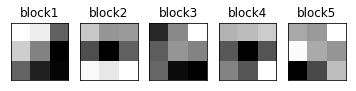

In [6]:
import matplotlib.pyplot as plt
layers = model.layers
layer_ids = [1,4,7,11,15]
#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(5):
    ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
    ax[i].set_title('block'+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

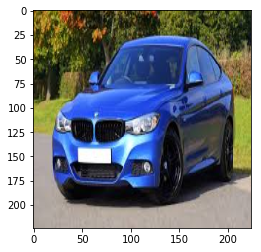

In [34]:
import cv2
#read the image
image = cv2.imread('car.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#resize image to appropriate dimensions
image = cv2.resize(image,(224,224))
plt.imshow(image)

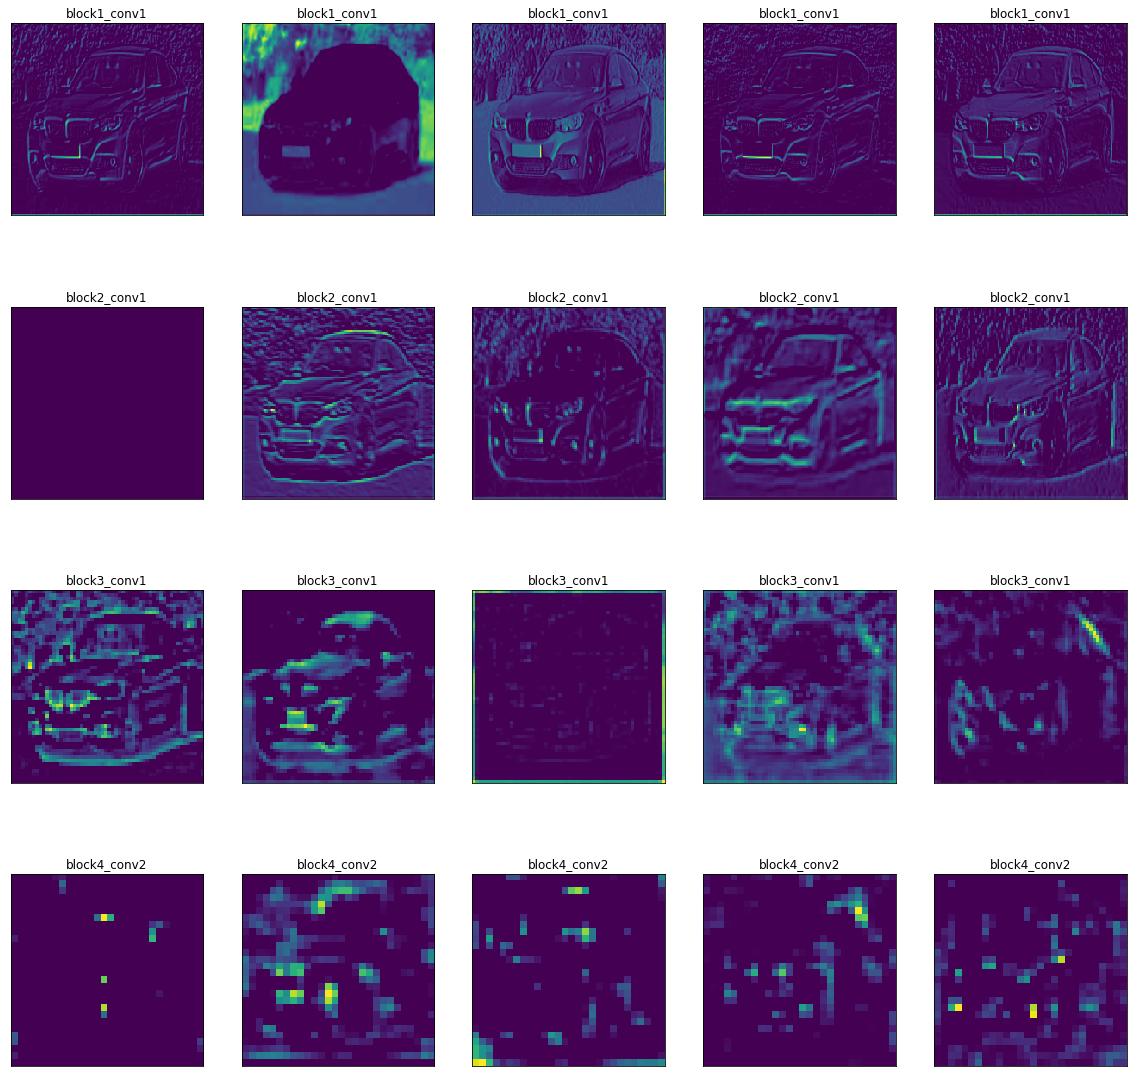

In [33]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
#extracting the output and appending to outputs
for layer_name in layer_names:
    intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)
#plotting the outputs
fig,ax = plt.subplots(nrows=4,ncols=5,figsize=(20,20))

for i in range(4):
    for z in range(5):
        ax[i][z].imshow(outputs[i][0,:,:,z])
        ax[i][z].set_title(layer_names[i])
        ax[i][z].set_xticks([])
        ax[i][z].set_yticks([])
plt.savefig('layerwise_output.jpg')